In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# Preprocessing
texts = newsgroups.data
labels = newsgroups.target

vocab_size = 10000
max_length = 500

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(20, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Predictions
y_pred = model.predict_classes(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot accuracy graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Epoch 1/5
236/236 [==============================] - 344s 1s/step - loss: 2.4671 - accuracy: 0.2286 - val_loss: 1.6175 - val_accuracy: 0.5032
Epoch 2/5
236/236 [==============================] - 314s 1s/step - loss: 1.1462 - accuracy: 0.6252 - val_loss: 0.9107 - val_accuracy: 0.7138
Epoch 3/5
236/236 [==============================] - 334s 1s/step - loss: 0.6802 - accuracy: 0.7944 - val_loss: 0.7077 - val_accuracy: 0.7979
Epoch 4/5
236/236 [==============================] - 333s 1s/step - loss: 0.4088 - accuracy: 0.8880 - val_loss: 0.7090 - val_accuracy: 0.8064
Epoch 5/5
236/236 [==============================] - 335s 1s/step - loss: 0.2840 - accuracy: 0.9269 - val_loss: 0.7158 - val_accuracy: 0.8149


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [19]:
from google.colab import files

# This will prompt you to upload a file from your local machine
uploaded = files.upload()

Saving emailSample.csv to emailSample (4).csv


In [21]:
import pandas as pd

# Load the dataset with a different encoding
df = pd.read_csv(filename, encoding='latin-1')

# Print column names and first few rows to verify
print("Column Names:", df.columns)
print(df.head())

Column Names: Index(['email_id', 'subject', 'email_content', 'label'], dtype='object')
        email_id                                            subject  \
0  abc@gmail.com  Observers for the SAU Entrance Test 2024 | Con...   
1  abc@gmail.com         Ride charges were paid twice by mistake.\n   
2  abc@gmail.com               Invitation to be the Session Chair\n   
3  abc@gmail.com                           Funds/Securities Balance   
4  abc@gmail.com     Project Exhibition -2: Review 3 (Final Review)   

                                       email_content        label  
0  Dear Sir,\n\nThank you very much for inviting ...      Genuine  
1  Ride on dated 09-Apr-2024 from NBCC to Netaji ...  Not Genuine  
2  Dear Professor Pritty Jain,\n\nThank you for t...      Genuine  
3  With reference to NSE circulars NSE/INSP/46704...  Not Genuine  
4  Dear Professors,\n\nKindly submit the marks ti...      Genuine  


Epoch 1/5
1/1 [==============================] - 5s 5s/step - loss: 0.6936 - accuracy: 0.4400 - val_loss: 0.6424 - val_accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - 1s 646ms/step - loss: 0.6429 - accuracy: 0.9200 - val_loss: 0.5997 - val_accuracy: 1.0000
Epoch 3/5
1/1 [==============================] - 1s 558ms/step - loss: 0.6138 - accuracy: 0.9200 - val_loss: 0.5564 - val_accuracy: 1.0000
Epoch 4/5
1/1 [==============================] - 1s 568ms/step - loss: 0.5661 - accuracy: 0.9200 - val_loss: 0.5106 - val_accuracy: 1.0000
Epoch 5/5
1/1 [==============================] - 1s 1s/step
Accuracy: 1.0


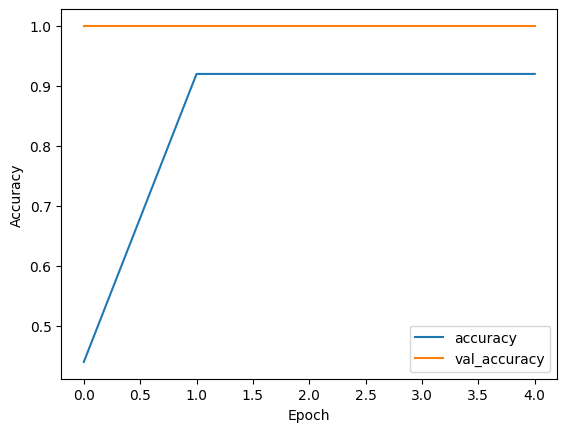

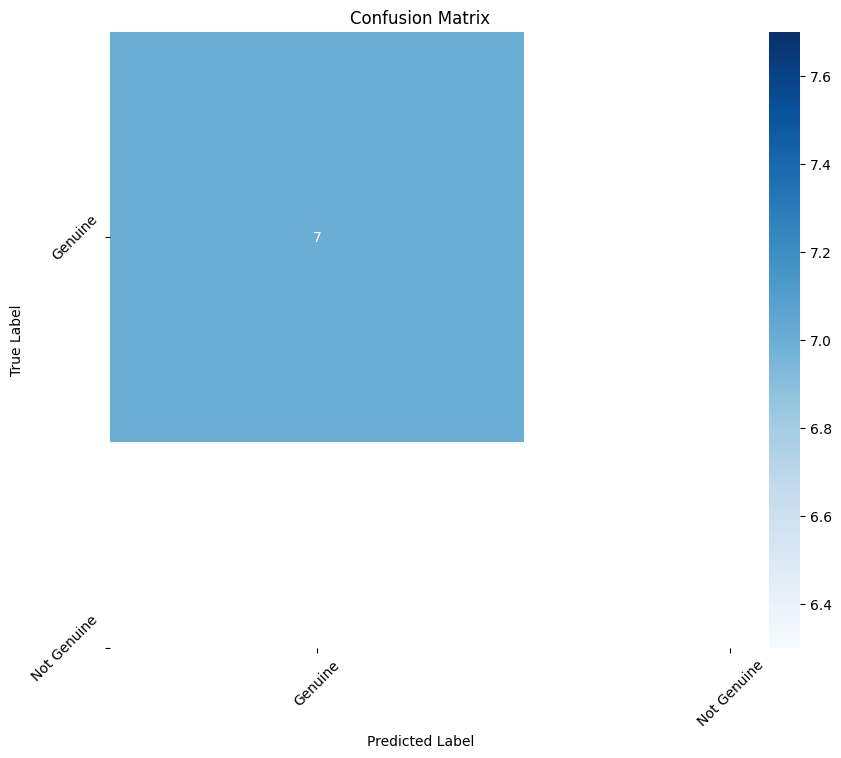

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the correct columns are referenced
texts = df['email_content'].values  # Change 'email_content' to the correct column name if different
labels = df['label'].values  # Change 'label' to the correct column name if different

# Encode labels if they are not numeric
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Preprocessing
vocab_size = 10000
max_length = 500

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Determine number of classes
num_classes = len(np.unique(labels))

# Build the model
model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot accuracy graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()